In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install statsmodels

In [3]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Exploratory Data Analysis

In [5]:
print('Rows in the dataset:',df.shape[0])
print('Columns in the dataset:',df.shape[1])

Rows in the dataset: 19104
Columns in the dataset: 14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Column Profiling:

• MMMM-YY : Reporting Date (Monthly) (date-time)

• Age : Age of the employee (numerical)

• Gender : Gender of the employee – Male : 0, Female: 1 (categorical)

• City : City Code of the employee (categorical)

• Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate (categorical)

• Income : Monthly average Income of the employee (numerical)

• Date Of Joining : Joining date for the employee (date-time)

• LastWorkingDate : Last date of working for the employee - Target Feature (date-time, but will be converted to categorical)

• Joining Designation : Designation of the employee at the time of joining (categorical, ordinal)

• Grade : Grade of the employee at the time of reporting (categorical, ordinal)

• Total Business Value : The total business value acquired by the employee in a month (negative business indicates cancellation/refund or car EMI adjustments) (numerical)

• Quarterly Rating : Quarterly rating of the employee: 1,2,3,4,5 (categorical, ordinal - higher is better)

In [8]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [10]:
#Unnamed and driver_id column are redundant and hence need to drop one. Dropping Unnamed

df.drop(columns='Unnamed: 0' , axis=1,inplace=True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [11]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [12]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# Data Processing and Feature Engineering

In [14]:
df1=df.copy(deep=True)

In [15]:
#Target variable creation: Create a column called target which tells whether the driver has left the company
# Driver whose last working day is present will have the value 1

first = (df1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [16]:
#Create a column which tells whether the quarterly rating has increased for that driver- 
#for those whose quartely rating has increased we assign a value 1

qr1=(df1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
qr2=(df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [17]:
qr1.shape,qr2.shape

((2381, 2), (2381, 2))

In [18]:
qr1.isna().sum(),qr2.isna().sum()

(Driver_ID           0
 Quarterly Rating    0
 dtype: int64,
 Driver_ID           0
 Quarterly Rating    0
 dtype: int64)

In [19]:
first=first.merge(qr1,on='Driver_ID')
first=first.merge(qr2,on='Driver_ID')

In [20]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [21]:
first['Promotion']=np.where(first['Quarterly Rating_x'] >= first['Quarterly Rating_y'],0,1)
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion
0,1,0,2,2,0
1,2,1,1,1,0
2,4,0,1,1,0
3,5,0,1,1,0
4,6,1,1,2,1


In [22]:
#Create a column which tells whether the monthly income has increased for that driver
#for those whose montly income has increased assign a value 1

inc1=(df1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
inc2=(df1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [23]:
inc1.shape,inc2.shape

((2381, 2), (2381, 2))

In [24]:
inc1.isna().sum(),inc2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [25]:
first=first.merge(inc1,on='Driver_ID')
first=first.merge(inc2,on='Driver_ID')

In [26]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [27]:
first['Raise']=np.where(first['Income_x'] <= first['Income_y'],0,1)

In [28]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [29]:
first.tail()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
2376,2784,1,3,4,1,82815,82815,0
2377,2785,0,1,1,0,12105,12105,0
2378,2786,0,2,1,0,35370,35370,0
2379,2787,0,2,1,0,69498,69498,0
2380,2788,1,1,2,1,70254,70254,0


In [30]:
first=first[['Driver_ID','target','Promotion','Raise']]

In [31]:
first.head()

,Driver_ID,target,Promotion,Raise
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,1,0


In [32]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
df1 = df1.groupby([df1['Driver_ID']]).aggregate(functions)
df1['month'] = pd.to_datetime(df['Dateofjoining']).dt.month
df1['year'] = pd.DatetimeIndex(df1['Dateofjoining']).year
df1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [33]:
df1.reset_index(drop=True,inplace=True)
df1=df1.merge(first,on='Driver_ID')
df1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Promotion,Raise
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,12,2020,1,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,11,2019,0,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,12,2019,0,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,12,2020,1,1,0


In [34]:
import regex
df1['Age']=df1['Age'].astype('int64')
df1['Cities']=df1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int64  
 14  year                  2381 non-null   int64  
 15  target               

In [36]:
df1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
df1['Gender'].replace({'M':0,'F':1},inplace=True)
df1['Gender']=df1['Gender'].astype('int64')

In [37]:
df1.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Promotion,Raise,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,12,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,1,1,0,11


In [38]:
sum(df1.isna().sum())

0

In [39]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


# Data Visualization

Univariate

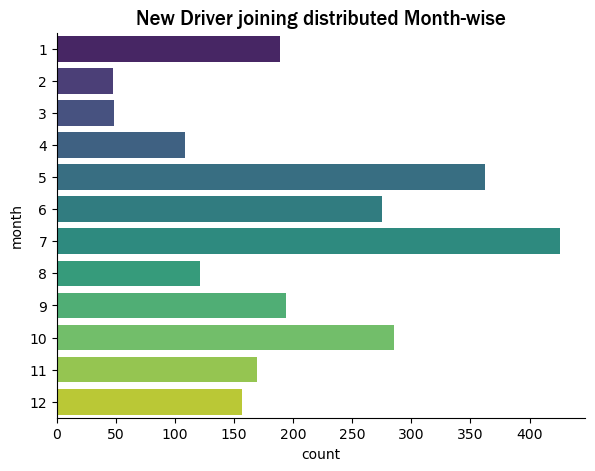

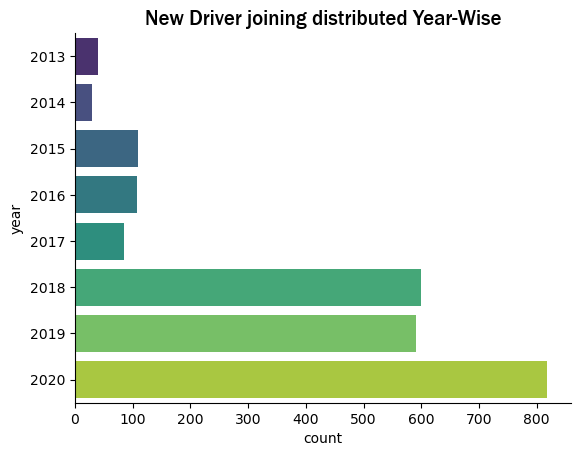

In [42]:
#figure1

fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(1,2,1)
sns.countplot(y=df1.month,palette='viridis')
plt.title('New Driver joining distributed Month-wise',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

ax=fig.add_subplot(1,2,2)
sns.countplot(y=df1.year,palette='viridis')
plt.title('New Driver joining distributed Year-Wise',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

Observations:

- Month of July shows the highest number of joiners across the span of 8 years
- February and March receives the lowest number of joiners across the span of 8 years
- There is close to a 500% boost of driver joining post 2017


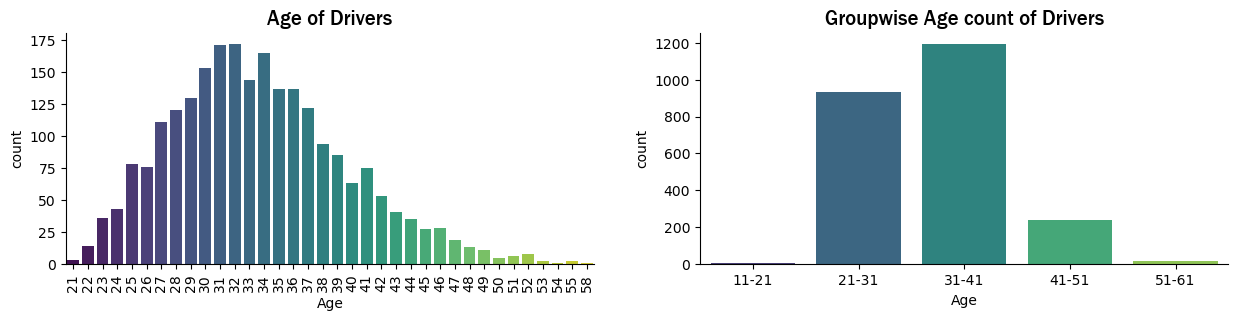

In [44]:
#figure2

fig=plt.figure(figsize=(15,3))
ax=fig.add_subplot(121)
sns.countplot(x=df1.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium',fontsize=15)
plt.xticks(rotation=90)

ax=fig.add_subplot(122)
a=pd.cut(df1.Age,bins=[11,21,31,41,51,61],labels=['11-21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

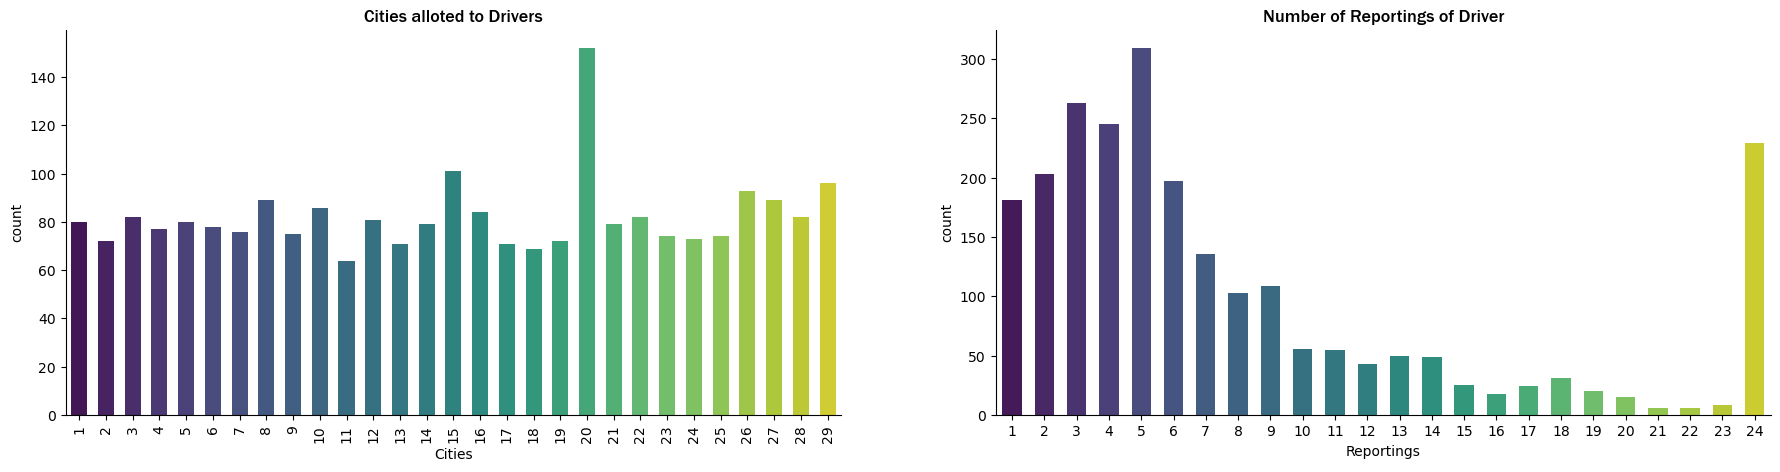

In [45]:
#figure3

fig=plt.figure(figsize=(22,5))
ax=fig.add_subplot(121)
sns.countplot(x=df1.Cities,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium',fontsize=13)
plt.xticks(rotation=90)

ax=fig.add_subplot(122)
sns.countplot(x=df1.Reportings,palette='viridis',width=0.6)
plt.title('Number of Reportings of Driver',fontname='Franklin Gothic Medium',fontsize=13)

#ax=fig.add_subplot(133)
#sns.countplot(x=df1.Education_Level,palette='viridis')
#plt.title('Educational Level of Drivers',fontname='Franklin Gothic Medium',fontsize=13)
sns.despine()
plt.show()

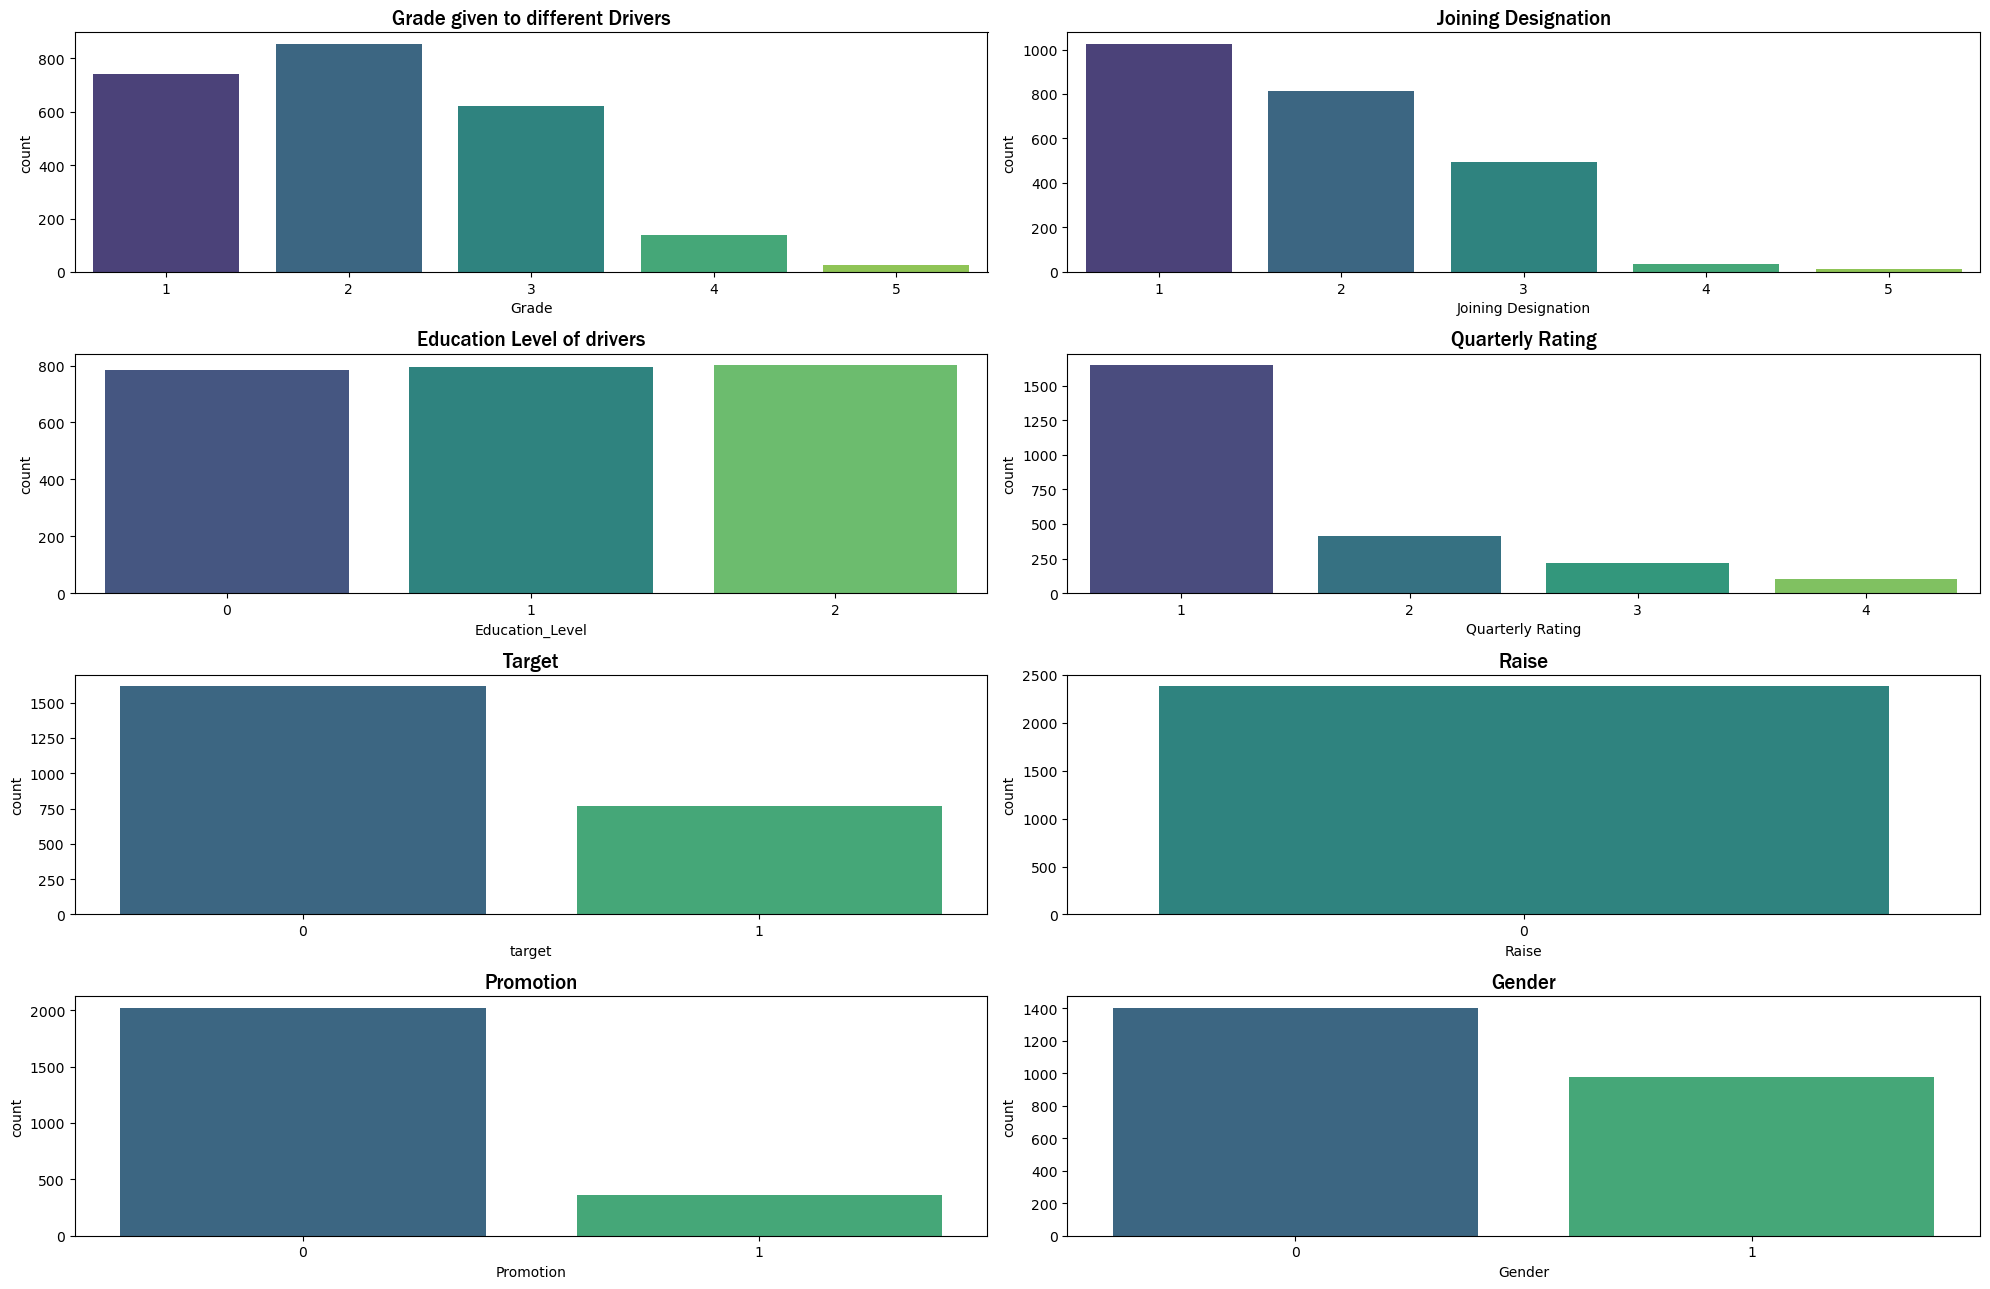

In [46]:
# Define columns and titles for each subplot
columns = [
    'Grade', 'Joining Designation', 'Education_Level', 'Quarterly Rating',
    'target', 'Raise', 'Promotion', 'Gender'
]
titles = [
    'Grade given to different Drivers', 'Joining Designation', 
    'Education Level of drivers', 'Quarterly Rating',
    'Target', 'Raise', 'Promotion', 'Gender'
]

# Set up the figure size and number of subplots
plt.figure(figsize=(20, 13))

# Loop through each column and title to create the subplots
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=df1[col], palette='viridis')
    plt.title(title, fontname='Franklin Gothic Medium', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

Observations:

- Between 21(min age) to 58(max age) years of age, max number of drivers are at 32 years and the age group with the highest number of drivers is 31-41
- 58.9% of the drivers are male
- C20 has the most number of alloted drivers
- The 3 education levels have equal distribution of drivers
- Grade 2 has been received by most of the Drivers and the count of grade keeps on falling as the grade number increases

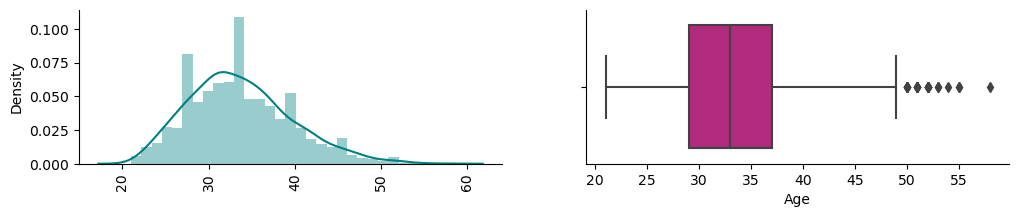

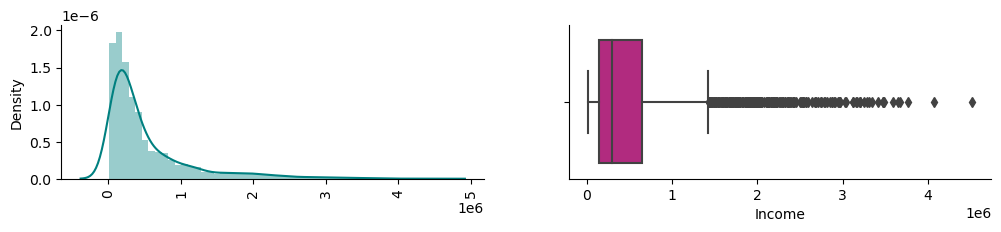

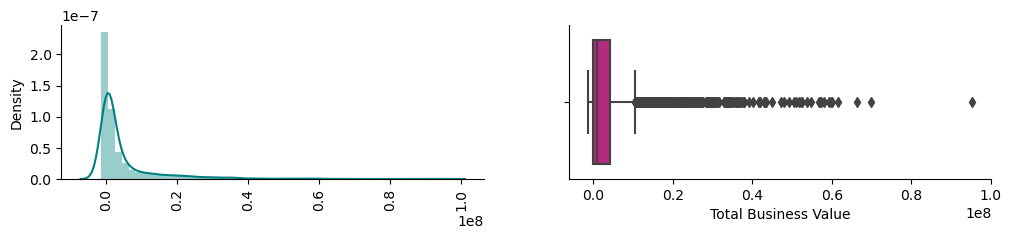

In [48]:
a=df1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=df1[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df1[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

Bivariate and Mutivariate

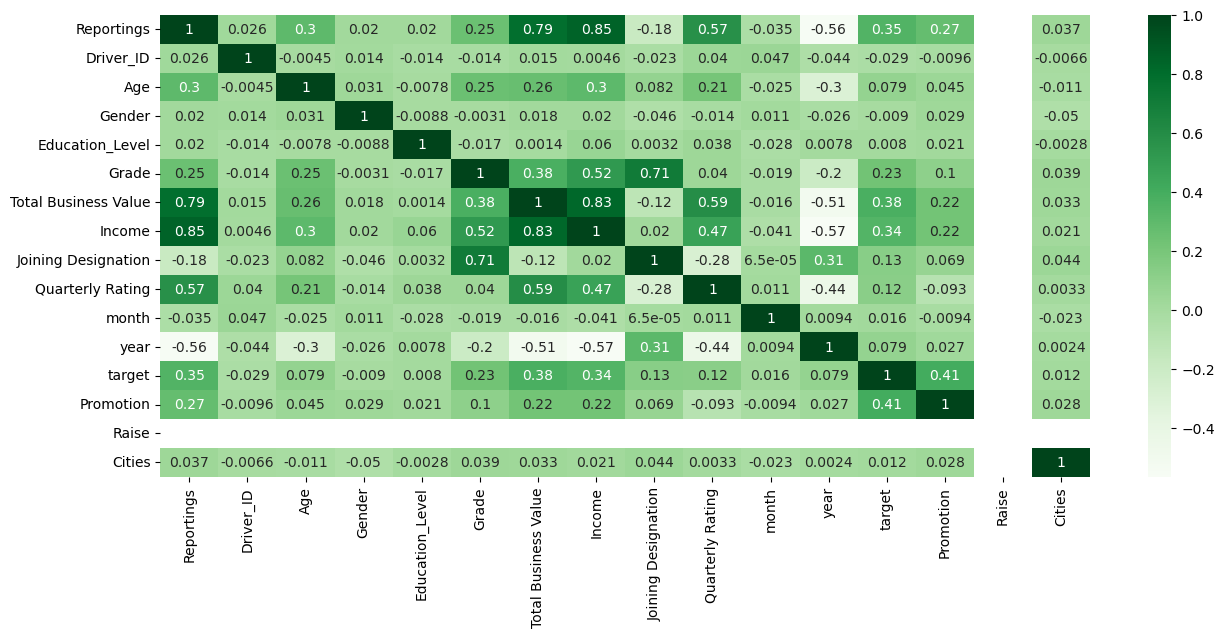

In [50]:
corr= df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

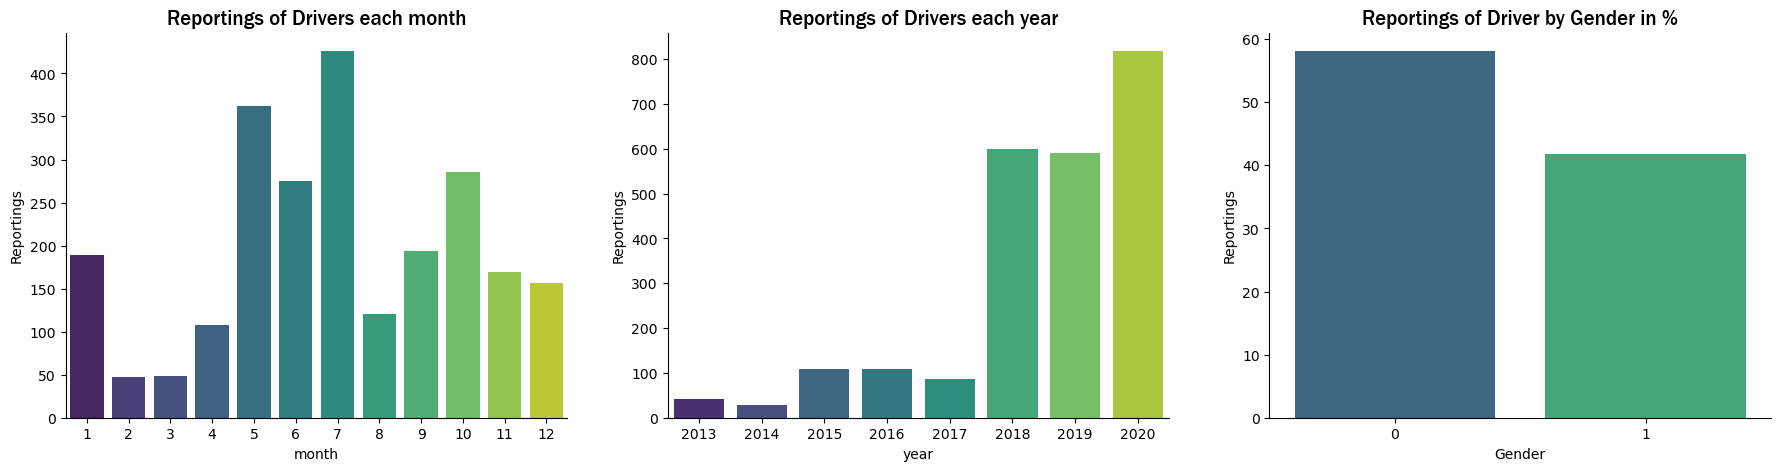

In [51]:
fig=plt.figure(figsize=(22,5))
ax=fig.add_subplot(1,3,1)
grouped_months=df1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
plt.title('Reportings of Drivers each month',fontname='Franklin Gothic Medium',fontsize=15)

ax=fig.add_subplot(1,3,2)
grouped_years=df1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_years,x='year',y='Reportings',palette='viridis')
plt.title('Reportings of Drivers each year',fontname='Franklin Gothic Medium',fontsize=15)

ax=fig.add_subplot(1,3,3)
grouped_gender=df1.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings']=(grouped_gender['Reportings']/sum(df1.Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y=grouped_gender['Reportings'],palette='viridis')
plt.title('Reportings of Driver by Gender in %',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

In [52]:
grouped_gender

,Gender,Reportings
0,0,58.12
1,1,41.88


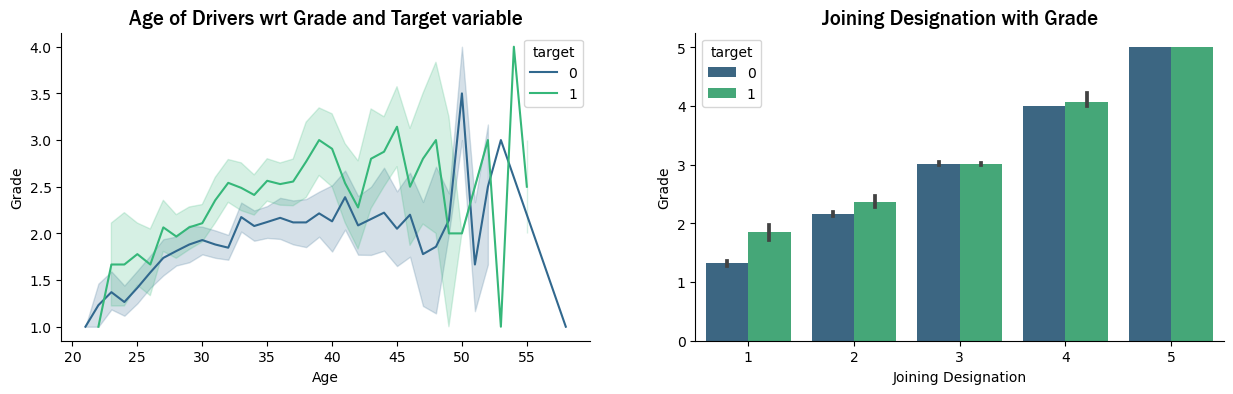

In [53]:
fig=plt.figure(figsize=(15,4))
ax=fig.add_subplot(1,2,1)
sns.lineplot(x=df1.Age,y=df1.Grade,hue=df1.target,palette='viridis')
plt.title('Age of Drivers wrt Grade and Target variable',fontname='Franklin Gothic Medium',fontsize=15)

ax=fig.add_subplot(1,2,2)
sns.barplot(data=df1, x='Joining Designation',y='Grade',palette='viridis',hue='target')
plt.title('Joining Designation with Grade',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

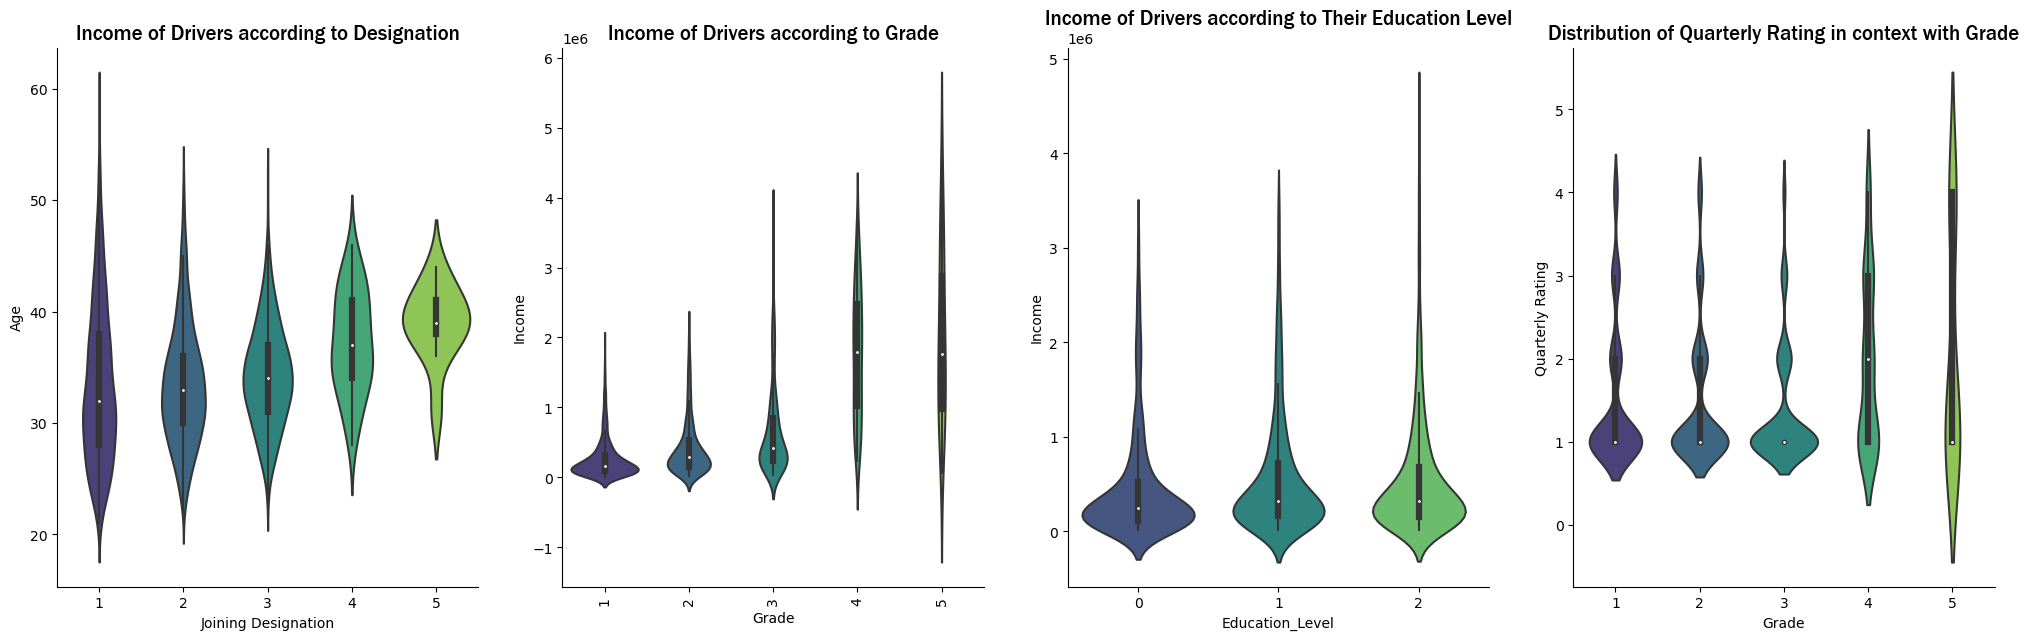

In [54]:
#figure7

plot_params = [
    {'x': 'Joining Designation', 'y': 'Age', 'title': 'Income of Drivers according to Designation'},
    {'x': 'Grade', 'y': 'Income', 'title': 'Income of Drivers according to Grade'},
    {'x': 'Education_Level', 'y': 'Income', 'title': 'Income of Drivers according to Their Education Level'},
    {'x': 'Grade', 'y': 'Quarterly Rating', 'title': 'Distribution of Quarterly Rating in context with Grade'}
]

# Set up the figure size
plt.figure(figsize=(25, 7))

# Loop through each set of parameters and create a subplot
for i, params in enumerate(plot_params, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(x=df1[params['x']], y=df1[params['y']], palette='viridis')
    plt.title(params['title'], fontname='Franklin Gothic Medium', fontsize=15)
    if params['x'] == 'Grade' and params['y'] == 'Income':  # Rotate x-ticks for the second plot
        plt.xticks(rotation=90)

# Remove unnecessary borders and display the plot
sns.despine()
plt.show()

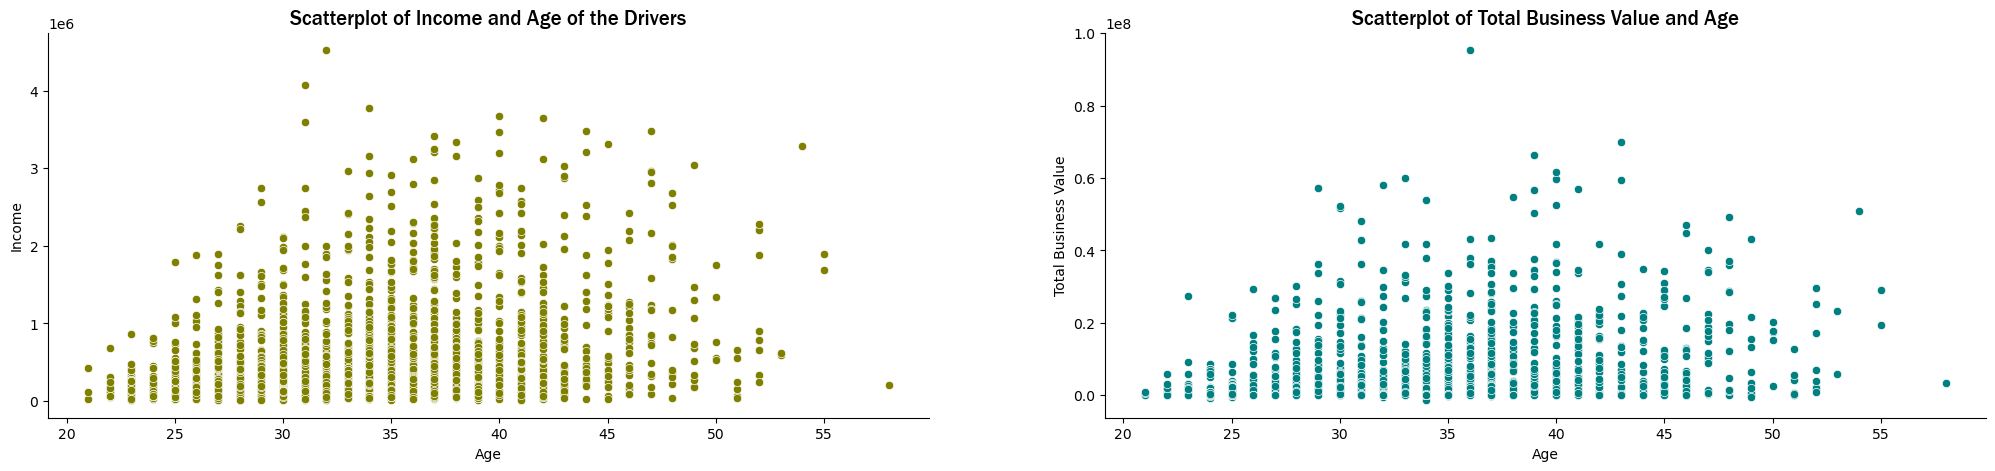

In [55]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df1.Age,y=df1.Income,color='olive')
plt.title('Scatterplot of Income and Age of the Drivers',fontname='Franklin Gothic medium',fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x=df1.Age,y=df1['Total Business Value'],color='teal')
plt.title('Scatterplot of Total Business Value and Age',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

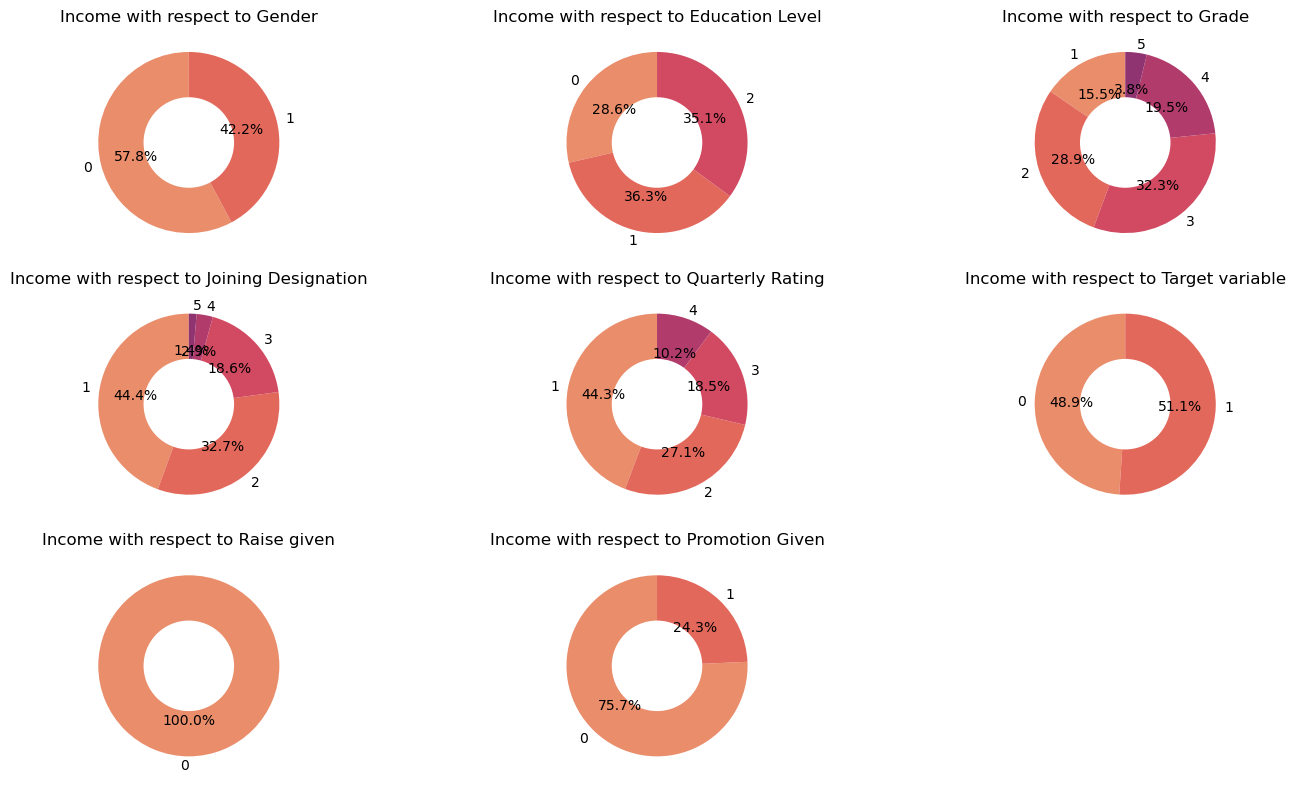

In [56]:
# Define grouping parameters and titles for each plot
groupings = [
    ('Gender', 'Income with respect to Gender'),
    ('Education_Level', 'Income with respect to Education Level'),
    ('Grade', 'Income with respect to Grade'),
    ('Joining Designation', 'Income with respect to Joining Designation'),
    ('Quarterly Rating', 'Income with respect to Quarterly Rating'),
    ('target', 'Income with respect to Target variable'),
    ('Raise', 'Income with respect to Raise given'),
    ('Promotion', 'Income with respect to Promotion Given')
]

# Set up the figure size and number of subplots
plt.figure(figsize=(15, 8))

# Loop through each grouping and create a donut plot
for i, (column, title) in enumerate(groupings, 1):
    # Group by the column and calculate income sum
    grouped_data = df1.groupby(column)['Income'].sum().reset_index()
    
    # Plot pie chart
    plt.subplot(3, 3, i)
    plt.pie(
        grouped_data['Income'], 
        labels=grouped_data[column], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('flare')
    )
    
    # Add a white circle in the center to make it a donut chart
    hole = plt.Circle((0, 0), 0.5, facecolor='white')
    plt.gcf().gca().add_artist(hole)
    plt.title(title)

# Remove unnecessary borders and display the plot
sns.despine()
plt.tight_layout()
plt.show()

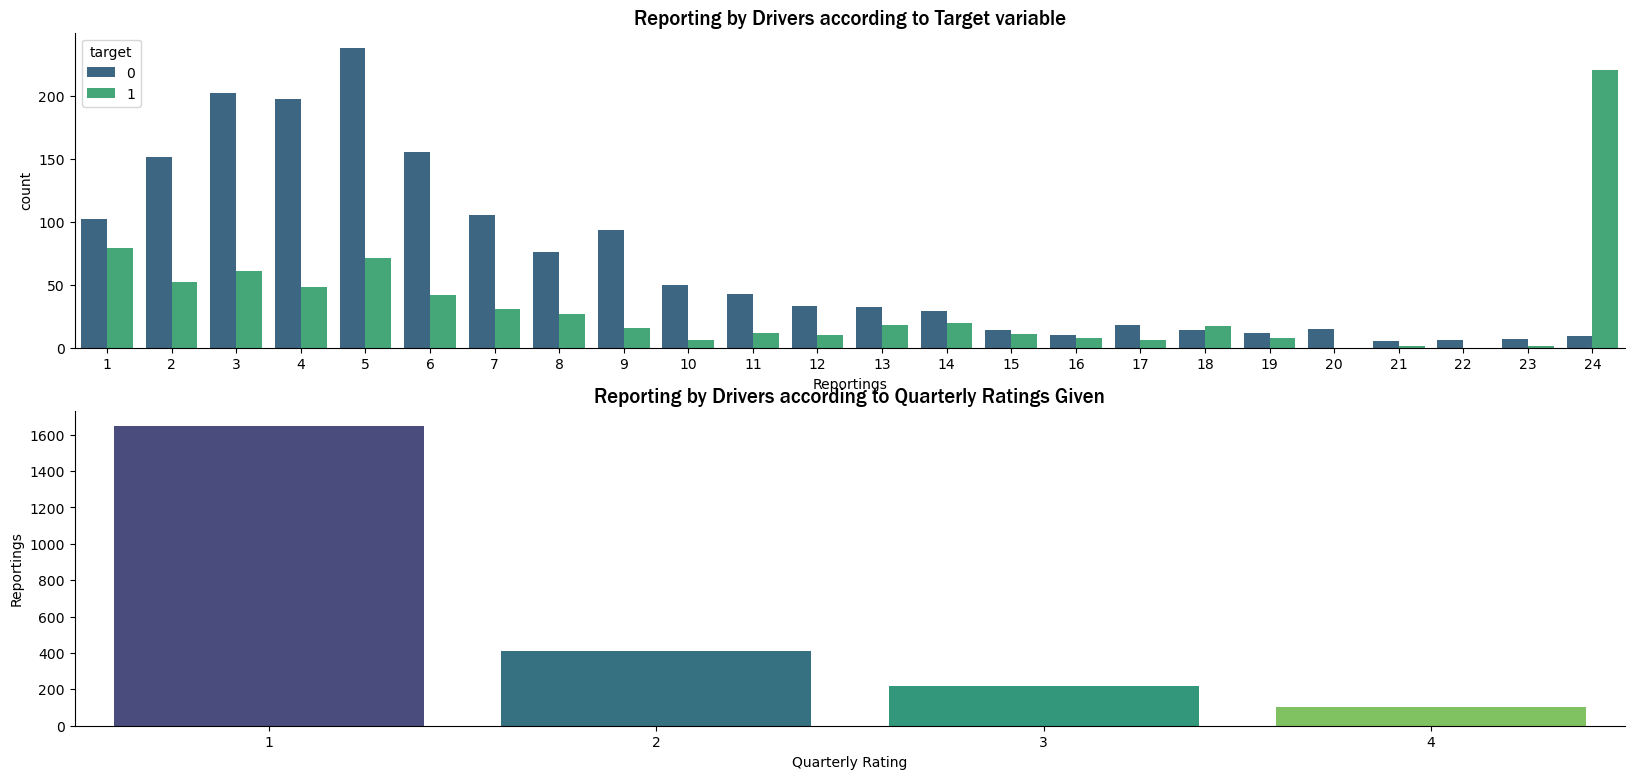

In [57]:
plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.countplot(x=df1['Reportings'],hue=df1.target,palette='viridis')
plt.title('Reporting by Drivers according to Target variable',fontname='Franklin Gothic Medium',fontsize=15)
plt.subplot(2,1,2)
grouped_rating=df1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data=grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting by Drivers according to Quarterly Ratings Given',fontname='Franklin Gothic Medium',fontsize=15)
sns.despine()
plt.show()

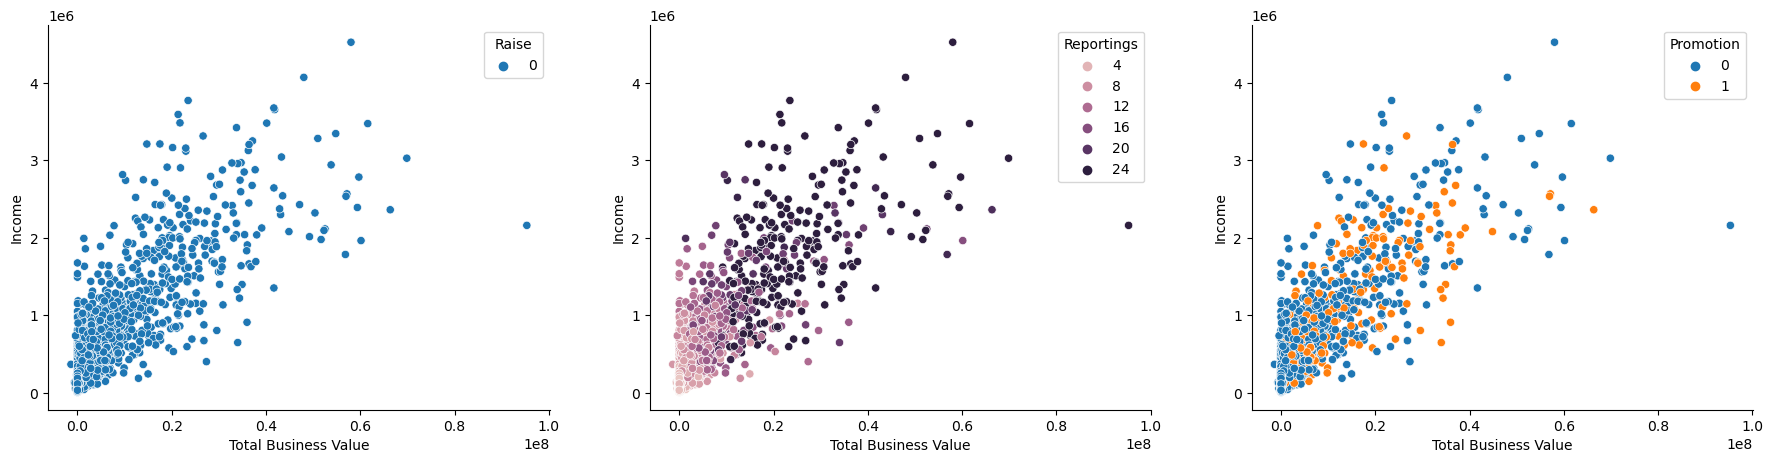

In [58]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Promotion)
sns.despine()
plt.show()

Observation:

- So we see that there are 57% male employees and 43% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- 97.3% of the employees who did not get a raise.
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
- Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
- Number of employees has been increase with increase in year as well as number of reportings.
- The majority of the employees seem to be associated with city C20.
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
- Income decreses with increase in Destination as about 4% of the employees hold higher designations.
- The median of the Income for employees having higher Grades is greater.
- Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
- Joining Designation Increases with increase in Grade.
- Max reporting days is 24 days.
- About 55% of the reportings of the employees has got Quarlerly Rating 1.
- Number of reportings increases with increase in Income as well as Total Business Value.

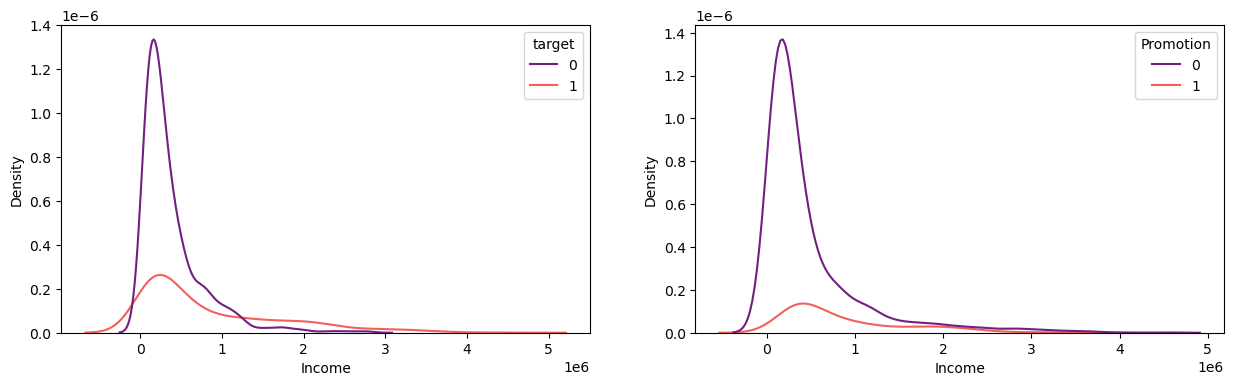

In [60]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=df1.Income,hue=df1['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=df1.Income,hue=df1['Promotion'],palette='magma')
plt.show()

# Outlier Treatment

In [62]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [63]:
len(df1[df1['Total Business Value']<1])

729

- Looking at the Total Business Value column we can see that there the amount is in -ve.
- This is to be considered as an outlier as it can affect the results of the ML model
- Consider only the parts of the dataset having total business value > 1
- Totally 729 rows have TBV <1

In [65]:
df1=df1[df1['Total Business Value'] >1]

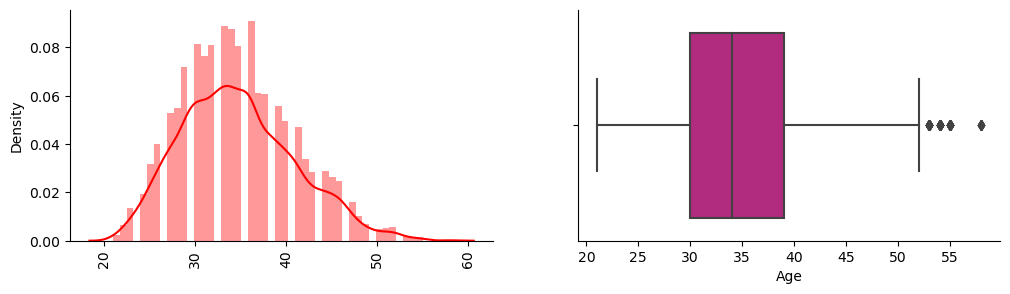

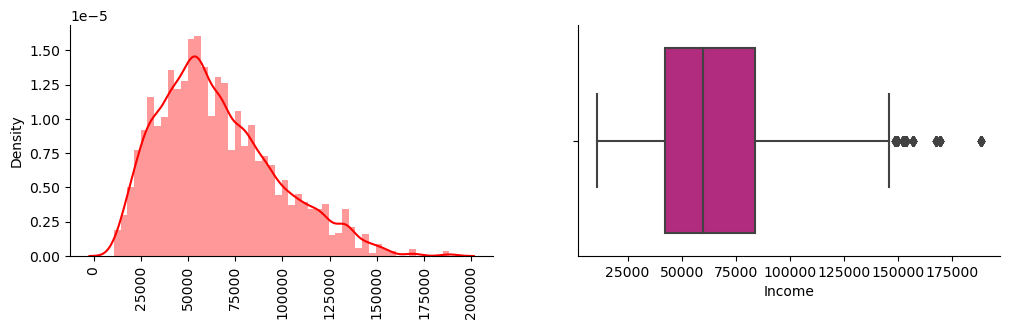

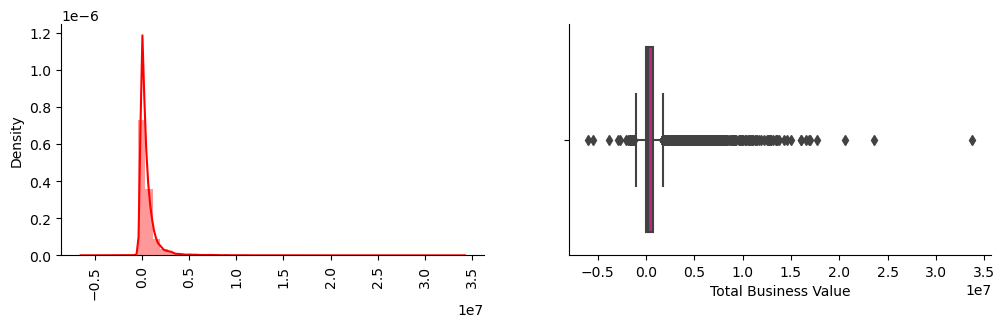

In [66]:
a= df1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    sns.distplot(x=df[i],color='red')
    plt.xticks(rotation=90)
    plt.subplot(122)
    sns.boxplot(x=df[i],color='mediumvioletred')
    sns.despine()
    plt.show()

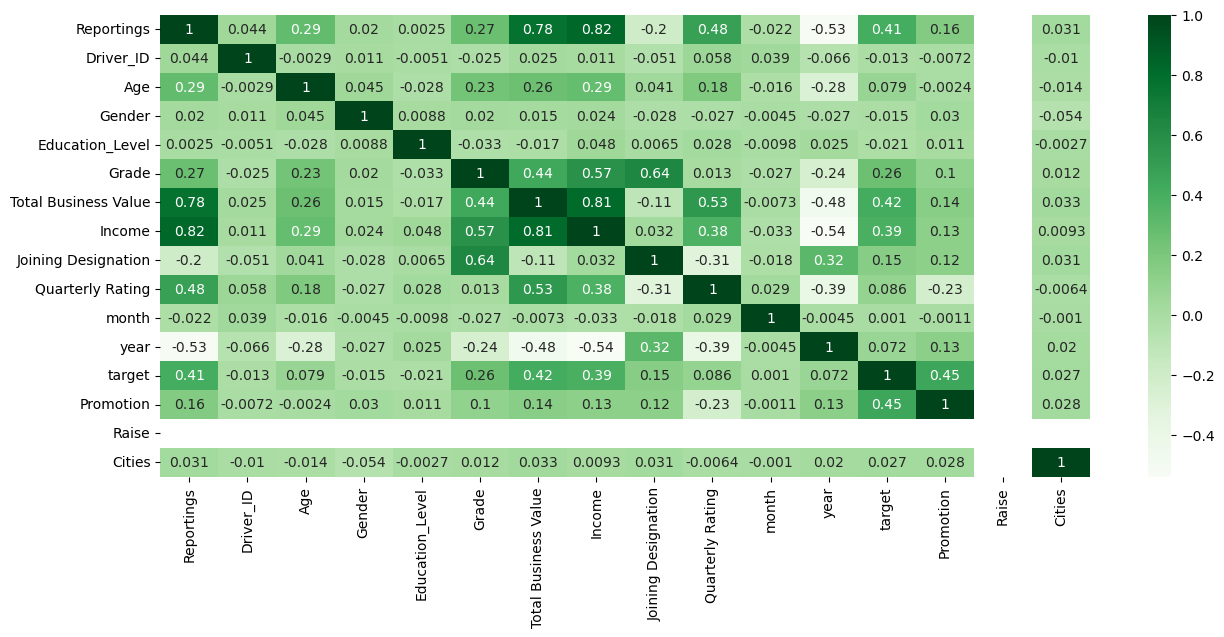

In [67]:
corr=df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

In [68]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,1652.0,1.026998e+01,6.967589e+00,1.0,5.0,8.0,14.0,24.0
Driver_ID,1652.0,1.390315e+03,8.082919e+02,1.0,679.5,1385.0,2097.0,2788.0
Age,1652.0,3.432385e+01,6.190776e+00,21.0,30.0,34.0,38.0,58.0
Gender,1652.0,4.158596e-01,4.930188e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,1652.0,1.030872e+00,8.093284e-01,0.0,0.0,1.0,2.0,2.0
Grade,1652.0,2.144068e+00,9.719606e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,1652.0,6.613094e+06,1.032794e+07,19580.0,663022.5,2242080.0,7418392.5,95331060.0
Income,1652.0,6.864932e+05,6.814522e+05,20886.0,236652.5,428960.0,877151.0,4522032.0
Joining Designation,1652.0,1.759685e+00,8.395129e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,1652.0,1.700363e+00,9.237035e-01,1.0,1.0,1.0,2.0,4.0


# Ensemble Learning

Data preparation:

The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -

If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave. • If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [71]:
!pip install xgboost

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [73]:
X=df1.drop('target',axis=1)
y=df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, return_times=False
    )[:3]  # We only need the first three outputs

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean, train_scores_std = train_scores.mean(axis=1), train_scores.std(axis=1)
    test_scores_mean, test_scores_std = test_scores.mean(axis=1), test_scores.std(axis=1)

    # Set up the plot
    plt.figure(figsize=(15, 5))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    # Plot learning curves with confidence intervals
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()

In [75]:
X.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Promotion,Raise,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,23
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,1,0,11
7,6,12,35,0,2,1,2607180,168696,1,4,1,2019,0,0,23


In [76]:
ss=StandardScaler()
ss.fit_transform(X_train)

array([[-0.19094951,  1.11505285,  0.11315757, ..., -0.51408726,
         0.        , -1.69433386],
       [ 1.37302336, -1.30020441,  2.04476124, ..., -0.51408726,
         0.        , -0.63254242],
       [ 1.94174077,  0.33043191,  2.8495961 , ..., -0.51408726,
         0.        ,  1.37306363],
       ...,
       [-0.75966692,  0.05047327, -1.49651215, ..., -0.51408726,
         0.        , -0.86849607],
       [ 0.51994725,  1.32993339, -1.33554518, ..., -0.51408726,
         0.        , -1.57635703],
       [-0.33312886,  0.62021367, -0.69167729, ..., -0.51408726,
         0.        , -0.27861194]])

In [77]:
from sklearn.model_selection import cross_validate

In [78]:
classifiers=[
    ('Logistic Regression',LogisticRegression()),
    ('Decision Tree',DecisionTreeClassifier()),
    ('Random Forest',RandomForestClassifier()),
    ('Gradient Boosting',GradientBoostingClassifier()),
    ('XGBoost',XGBClassifier())
]

for name,model in classifiers:
    scores=cross_val_score(model,X,y,cv=5)
    print(f"{name}:{scores.round(2)}")
    print(f"Mean:{scores.mean():.2f}\n")

Logistic Regression:[0.7  0.75 0.75 0.75 0.76]
Mean:0.74

Decision Tree:[0.82 0.88 0.87 0.84 0.84]
Mean:0.85

Random Forest:[0.9  0.9  0.88 0.88 0.92]
Mean:0.90

Gradient Boosting:[0.89 0.91 0.88 0.86 0.89]
Mean:0.89

XGBoost:[0.89 0.91 0.87 0.86 0.9 ]
Mean:0.89



Machine Learning Model :-

Without the treatment of class imbalance

Random Forest Classfier

In [80]:
#model=RandomForestClassifier()
#param_grid={
#    'n_estimators':list(range(10,20)),
#    'max_features':['auto','sqrt','log2'],
#    'max_depth':[4,5,6,7,8],
#    'criterion':['gini','entropy']
#}

In [81]:
rf_clf1 = RandomForestClassifier(criterion='gini', max_depth=7, max_features='sqrt', n_estimators=10)
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

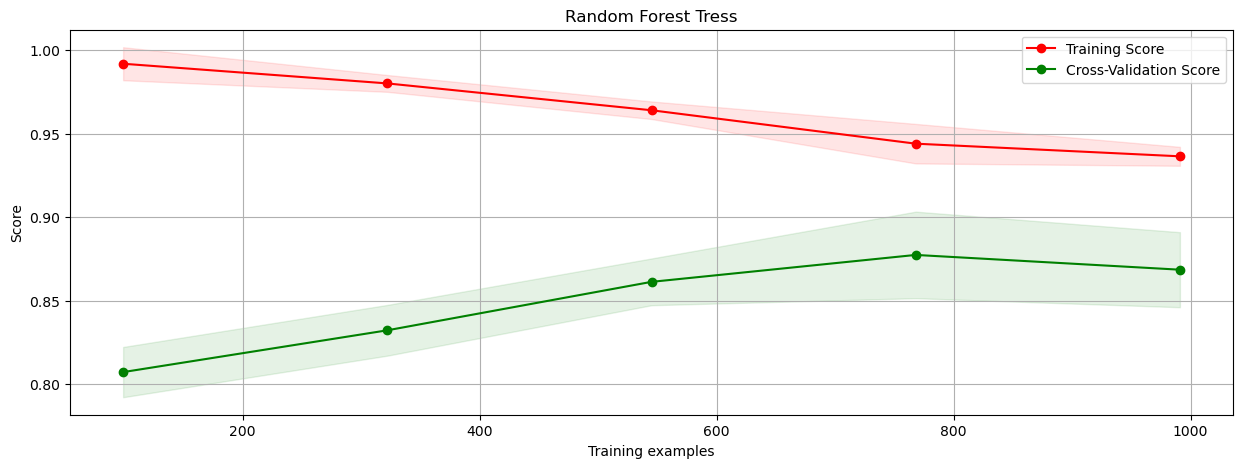

In [82]:
plot_learning_curve(rf_clf1,X_train,y_train,'Random Forest Tress')

In [83]:
y_pred=rf_clf1.predict(X_test)
proba=rf_clf1.predict_proba(X_test)[:,1]
print('Train data accuracy:',rf_clf1.score(X_train,y_train))
print('Test data accuracy:',rf_clf1.score(X_test,y_test))
print('Accuracy of the model:',accuracy_score(y_test,y_pred))
print('ROC-AUC score test dataset:',roc_auc_score(y_test,proba))
print('_'*70)
print(classification_report(y_test,y_pred))
print('_'*70)
cm1=(confusion_matrix(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Train data accuracy: 0.9281678773204197
Test data accuracy: 0.8668280871670703
Accuracy of the model: 0.8668280871670703
ROC-AUC score test dataset: 0.938976377952756
______________________________________________________________________
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       254
           1       0.87      0.77      0.82       159

    accuracy                           0.87       413
   macro avg       0.87      0.85      0.86       413
weighted avg       0.87      0.87      0.87       413

______________________________________________________________________
Confusion Matrix
[[235  19]
 [ 36 123]]


In [84]:
rf_clf_imp1=rf_clf1.feature_importances_

XG Boosting Classifier

In [86]:
gbc1=GradientBoostingClassifier()
gbc1.fit(X_train,y_train)
y_pred=gbc1.predict(X_test)
proba=gbc1.predict_proba(X_test)[:,1]

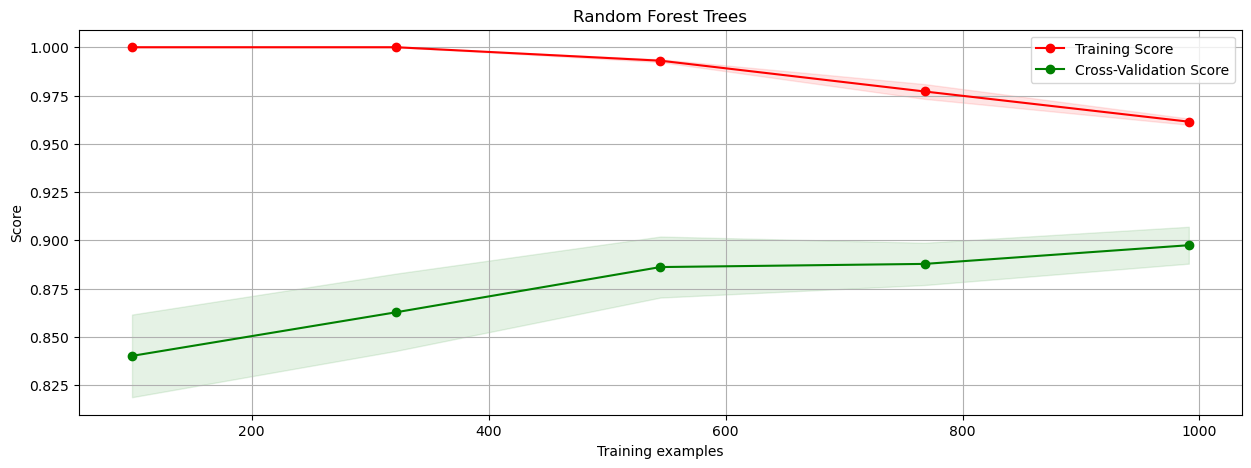

In [87]:
plot_learning_curve(gbc1,X_train,y_train,'Random Forest Trees')

In [88]:
gbc_clf_imp1=gbc1.feature_importances_

In [89]:
print('Train Score:',gbc1.score(X_train,y_train))
print('Test Score:',gbc1.score(X_test,y_test))
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC-AUC score test dataset:',roc_auc_score(y_test,proba))
print('-'*60)
print(classification_report(y_test,y_pred))
print('_'*60)
print('Confusion Matrix')
cm2=(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('-'*60)

Train Score: 0.9515738498789347
Test Score: 0.8886198547215496
Accuracy Score: 0.8886198547215496
ROC-AUC score test dataset: 0.9514930916654287
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       254
           1       0.87      0.84      0.85       159

    accuracy                           0.89       413
   macro avg       0.88      0.88      0.88       413
weighted avg       0.89      0.89      0.89       413

____________________________________________________________
Confusion Matrix
[[234  20]
 [ 26 133]]
------------------------------------------------------------


Class Imbalance Treatment

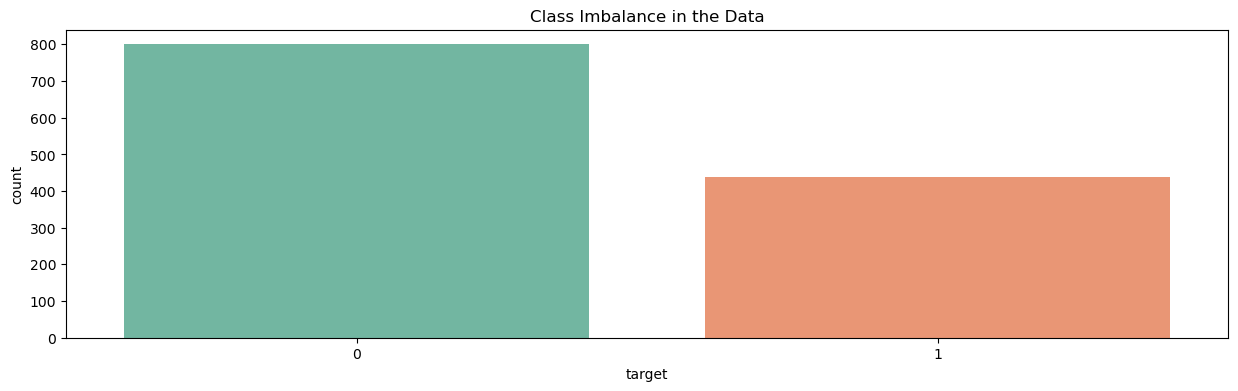

In [91]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [92]:
(y_train.value_counts()*100)/len(y_train)

0    64.5682
1    35.4318
Name: target, dtype: float64

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
smot=SMOTE(random_state=42)
X_train_smot,y_train_smot= smot.fit_resample(X_train,y_train.ravel())

In [95]:
X_train_smot.shape,y_train_smot.shape

((1600, 15), (1600,))

In [96]:
X_test.shape,y_test.shape

((413, 15), (413,))

In [97]:
from collections import Counter
c=Counter(y_train_smot)
print(c)

Counter({0: 800, 1: 800})


# Random Forest Classifier

In [99]:
clf=RandomForestClassifier()
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [100]:
clf=RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='sqrt',n_estimators=19)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

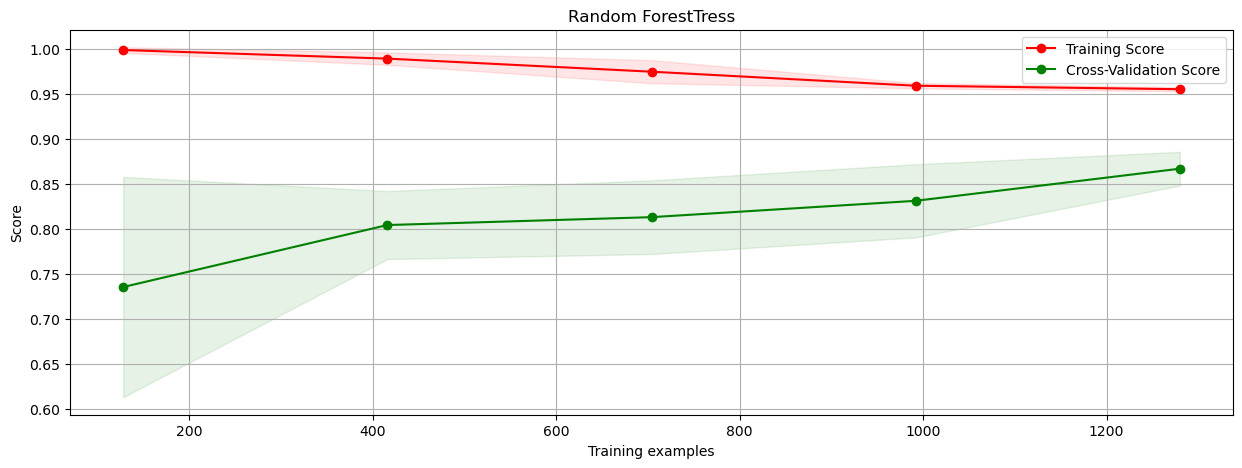

In [101]:
plot_learning_curve(clf,X_train_smot,y_train_smot,"Random ForestTress")

In [102]:
y_pred=clf.predict(X_test)
print('-'*70)
print(classification_report(y_test,y_pred))
print('-'*70)
print('Confusion Matrix')
cm3=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       254
           1       0.82      0.87      0.84       159

    accuracy                           0.88       413
   macro avg       0.87      0.87      0.87       413
weighted avg       0.88      0.88      0.88       413

----------------------------------------------------------------------
Confusion Matrix
[[224  30]
 [ 21 138]]


In [103]:
rf_clf_imp2=clf.feature_importances_

Gradient Boosting

In [105]:
gbc2=GradientBoostingClassifier()
gbc2.fit(X_train_smot,y_train_smot)
y_pred1=gbc2.predict(X_test)
gbc_clf_imp2=gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test,y_pred1))
print('-'*60)
cm4=confusion_matrix(y_test,y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       254
           1       0.82      0.88      0.85       159

    accuracy                           0.88       413
   macro avg       0.87      0.88      0.88       413
weighted avg       0.88      0.88      0.88       413

------------------------------------------------------------
Confusion Matrix
[[224  30]
 [ 19 140]]
------------------------------------------------------------


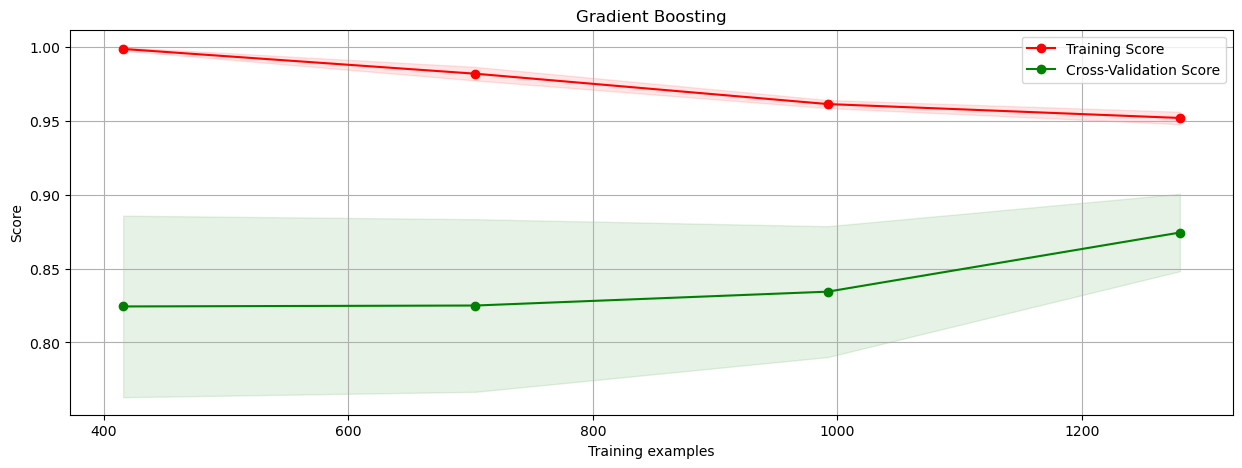

In [106]:
plot_learning_curve(gbc2,X_train_smot,y_train_smot,"Gradient Boosting")

In [107]:
data1=pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})

In [108]:
data2=pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})

In [109]:
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.225072,0.395280
1,Driver_ID,0.027530,0.014497
2,Age,0.031062,0.008759
3,Gender,0.004569,0.001229
4,Education_Level,0.008147,0.001218
5,Grade,0.051356,0.000556
6,Total Business Value,0.145671,0.083510
7,Income,0.087800,0.022274
8,Joining Designation,0.024661,0.006666
9,Quarterly Rating,0.020383,0.000156


In [110]:
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.227355,0.231162
1,Driver_ID,0.037399,0.015502
2,Age,0.039186,0.008874
3,Gender,0.015801,0.013467
4,Education_Level,0.018632,0.008966
5,Grade,0.018520,0.006140
6,Total Business Value,0.133616,0.284551
7,Income,0.123557,0.023035
8,Joining Designation,0.027092,0.001233
9,Quarterly Rating,0.030675,0.022524


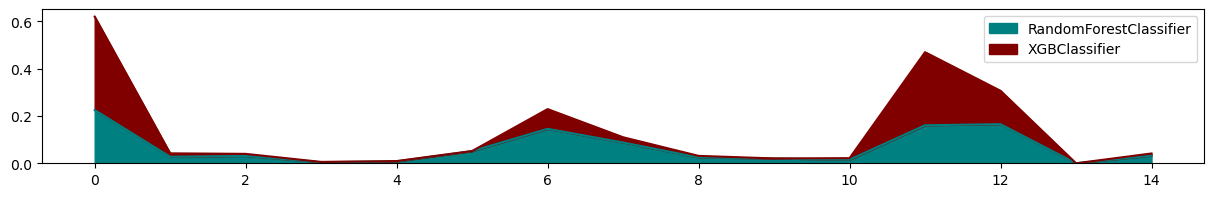

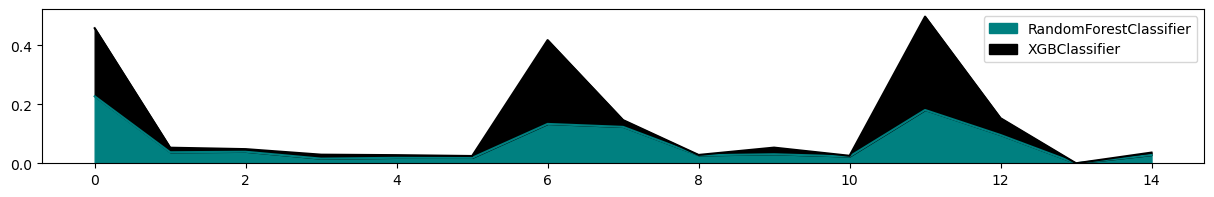

In [111]:
data1.plot(kind='area',figsize=(15,2),color=['teal','maroon'])
data2.plot(kind='area',figsize=(15,2),color=['teal','black'])
plt.show()                                    

In [112]:
# List of confusion matrices
confusion_matrices = [cm1, cm2, cm3, cm4]

# Initialize lists to store the results
precisions = []
recalls = []
f1_scores = []

# Loop through each confusion matrix and calculate precision, recall, and F1 score
for cm in confusion_matrices:
    tp, fp, fn, tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Display the results
for i in range(4):
    print(f"Confusion Matrix {i+1}:")
    print(f"Precision: {precisions[i]:.2f}, Recall: {recalls[i]:.2f}, F1 Score: {f1_scores[i]:.2f}\n")

Confusion Matrix 1:
Precision: 0.93, Recall: 0.87, F1 Score: 0.90

Confusion Matrix 2:
Precision: 0.92, Recall: 0.90, F1 Score: 0.91

Confusion Matrix 3:
Precision: 0.88, Recall: 0.91, F1 Score: 0.90

Confusion Matrix 4:
Precision: 0.88, Recall: 0.92, F1 Score: 0.90



In [113]:
# Model and Class types corresponding to each confusion matrix
models = ['RandomForest', 'GradientBoosting', 'RandomForest', 'GradientBoosting']
classes = ['imbalanced', 'imbalanced', 'balanced', 'balanced']

# Extract True Positive, False Positive, False Negative, and True Negative from each confusion matrix
true_pos = [cm[0][0] for cm in confusion_matrices]
fal_pos = [cm[0][1] for cm in confusion_matrices]
fal_neg = [cm[1][0] for cm in confusion_matrices]
true_neg = [cm[1][1] for cm in confusion_matrices]

# Create the DataFrame with the results
df_final = pd.DataFrame({
    'Model': models,
    'Class': classes,
    'True_pos': true_pos,
    'Fal_pos': fal_pos,
    'Fal_neg': fal_neg,
    'True_neg': true_neg,
    'F1_score%': [f * 100 for f in f1_scores],
    'Precision%': [p * 100 for p in precisions],
    'Recall%': [r * 100 for r in recalls]
})

# Display the DataFrame
print(df_final)

              Model       Class  True_pos  Fal_pos  Fal_neg  True_neg  \
0      RandomForest  imbalanced       235       19       36       123   
1  GradientBoosting  imbalanced       234       20       26       133   
2      RandomForest    balanced       224       30       21       138   
3  GradientBoosting    balanced       224       30       19       140   

   F1_score%  Precision%    Recall%  
0  89.523810   92.519685  86.715867  
1  91.050584   92.125984  90.000000  
2  89.779559   88.188976  91.428571  
3  90.140845   88.188976  92.181070  


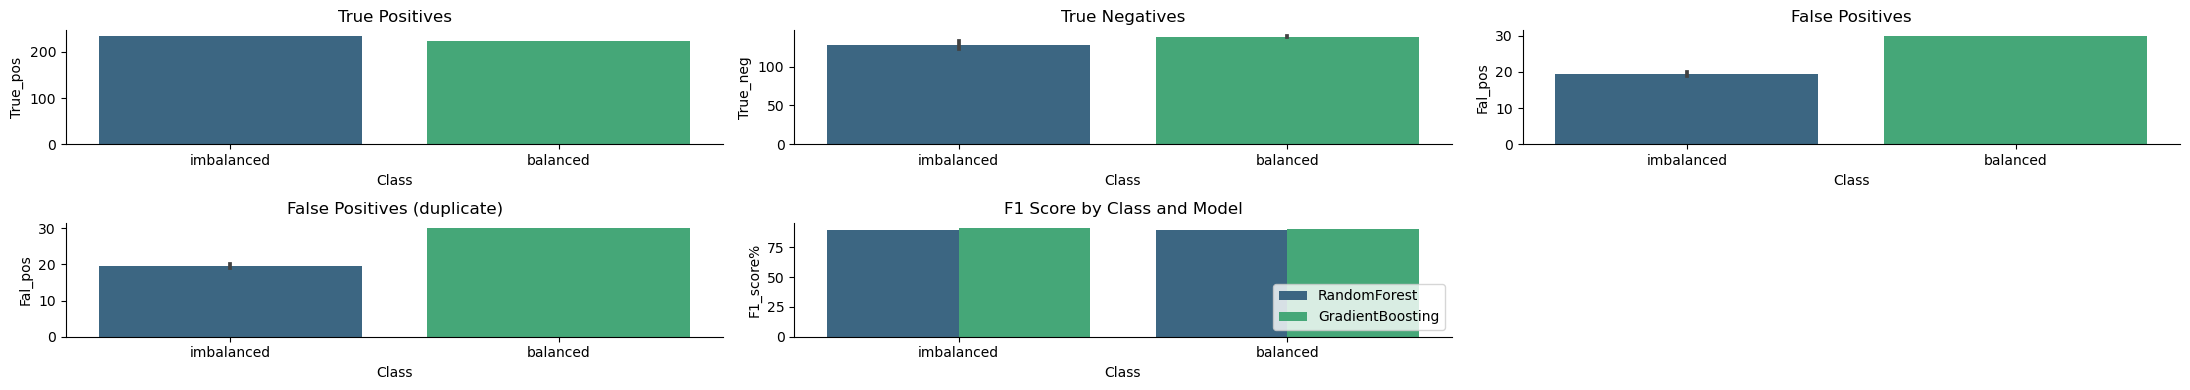

In [213]:
plt.figure(figsize=(22, 4))

# Plot for True Positives
plt.subplot(2, 3, 1)
sns.barplot(x=df_final['Class'], y=df_final['True_pos'], palette='viridis')
plt.title("True Positives")

# Plot for True Negatives
plt.subplot(2, 3, 2)
sns.barplot(x=df_final['Class'], y=df_final['True_neg'], palette='viridis')
plt.title("True Negatives")

# Plot for False Positives
plt.subplot(2, 3, 3)
sns.barplot(x=df_final['Class'], y=df_final['Fal_pos'], palette='viridis')
plt.title("False Positives")

# Duplicate False Positives plot (if intended to represent something else, change as needed)
plt.subplot(2, 3, 4)
sns.barplot(x=df_final['Class'], y=df_final['Fal_pos'], palette='viridis')
plt.title("False Positives (duplicate)")

# Plot for F1 Score, with Model as hue
plt.subplot(2, 3, 5)
sns.barplot(x=df_final['Class'], y=df_final['F1_score%'], hue=df_final['Model'], palette='viridis')
plt.legend(loc='lower right')
plt.title("F1 Score by Class and Model")

sns.despine()
plt.tight_layout()
plt.show()

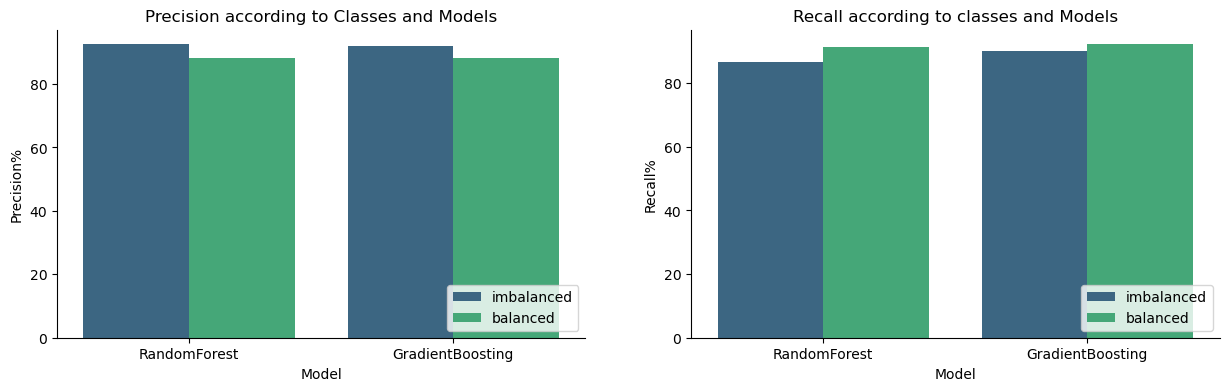

In [215]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x=df_final['Model'],y=df_final['Precision%'],hue=df_final['Class'],palette='viridis')
plt.title('Precision according to Classes and Models')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
sns.barplot(x=df_final['Model'],y=df_final['Recall%'],hue=df_final['Class'],palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

Insights:
- So we see that there are 57% male employees and 43% female employees.
- The percentages of employees with different education levels are almost same for level 1 & 2.
- 97.3% of the employees who did not get a raise.
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.
- Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.
- Number of employees has been increase with increase in year as well as number of reportings.
- The majority of the employees seem to be associated with city C20.
- Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.
- Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.
- Income decreses with increase in Destination as about 4% of the employees hold higher designations.
- The median of the Income for employees having higher Grades is greater.
- Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.
- Joining Designation Increases with increase in Grade.
- Top reporting days is 24 days.
- About 55% of the reportings of the employees has got Quarlerly Rating 1.
- Number of reportings increases with increase in Income as well as Total Business Value.
- Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.
- Precision dropped after treatment of data imbalance and is performing better in Random Forest.
- F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.